In [4]:
# 이전 예제를 subclassing 네트워크 설계 방식 적용
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model, load_model
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, ReLU
from keras.callbacks import EarlyStopping
from keras.utils import register_keras_serializable

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 구조 변경 (차원)
print(x_train.shape) # (60000, 28, 28)
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0 # 흑백이기 때문에 1을 준다
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
print(x_train.shape) # (60000, 28, 28, 1)

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
# 모델 정의 (묵시적 방법)
# 사용자 정의 클래스(모델, 레이어, 함수:손실, 활성화)를 모델 저장시 자동으로 직렬화 시스템에 등록해 주는 역할
@register_keras_serializable(package='custom') # 'losses', 'activation'
class MyMnistCnn(Model): # python class 이름은 대문자 시작하자 / Model 메소드를 입맛에 맞게 override하고 있다
    def __init__(self, **kwargs): # self? 클래스 메서드 안에서 객체 자신을 가리키는 변수 / 인스턴스 자신 / 메시지를 받는 주체
        super().__init__(**kwargs)
        # Conv block1
        self.conv1 = Conv2D(16, (3,3), padding='same', use_bias=False, activation='relu')
        self.batch1 = BatchNormalization()
        self.pool1 = MaxPool2D((2,2))
        
        # Conv block2
        self.conv2 = Conv2D(32, (3,3), padding='same', use_bias=False, activation='relu')
        self.batch2 = BatchNormalization()
        self.pool2 = MaxPool2D((2,2))
        
        # Conv block3
        self.conv3 = Conv2D(64, (3,3), padding='same', use_bias=False, activation='relu')
        self.batch3 = BatchNormalization()
        self.pool3 = MaxPool2D((2,2))
        
        self.flat = Flatten()
        
        self.d1 = Dense(64, activation='relu')
        self.do1 = Dropout(0.3)
        self.d2 = Dense(32, activation='relu')
        self.do2 = Dropout(0.2)
        self.out = Dense(10, activation='softmax')
        
    def call(self, inputs, train=False):
        x = self.conv1(inputs)
        x = self.batch1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.batch3(x)
        x = self.pool3(x)
        x = self.flat(x)
        x = self.d1(x)
        x = self.do1(x, training=True) # traing=True?
        x = self.d2(x)
        x = self.do2(x)
        return self.out(x)
    
model = MyMnistCnn()
model.build(input_shape=(None, 28, 28, 1))
model.summary()


/Users/bunny/miniconda3/envs/tf-mac-metal/lib/python3.11/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'my_mnist_cnn_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_mnist_cnn_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 학습 방법
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(patience=3, restore_best_weights=True)

# 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[es], verbose=2)


Epoch 1/100
422/422 - 12s - 27ms/step - accuracy: 0.8824 - loss: 0.3706 - val_accuracy: 0.9673 - val_loss: 0.1076
Epoch 2/100
422/422 - 8s - 20ms/step - accuracy: 0.9699 - loss: 0.0997 - val_accuracy: 0.9820 - val_loss: 0.0653
Epoch 3/100
422/422 - 8s - 20ms/step - accuracy: 0.9791 - loss: 0.0681 - val_accuracy: 0.9857 - val_loss: 0.0551
Epoch 4/100
422/422 - 8s - 20ms/step - accuracy: 0.9845 - loss: 0.0527 - val_accuracy: 0.9837 - val_loss: 0.0510
Epoch 5/100
422/422 - 8s - 19ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9868 - val_loss: 0.0483
Epoch 6/100
422/422 - 8s - 20ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9890 - val_loss: 0.0416
Epoch 7/100
422/422 - 9s - 21ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9872 - val_loss: 0.0415
Epoch 8/100
422/422 - 9s - 21ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9868 - val_loss: 0.0509
Epoch 9/100
422/422 - 9s - 22ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9892 -

In [19]:
# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'train_loss : {train_loss:.4f}, train_acc : {train_acc*100:.4f}%')
print(f'test_loss : {test_loss:.4f}, test_acc : {test_acc*100:.4f}%')

train_loss : 0.0167, train_acc : 99.4833%
test_loss : 0.0425, test_acc : 98.9100%


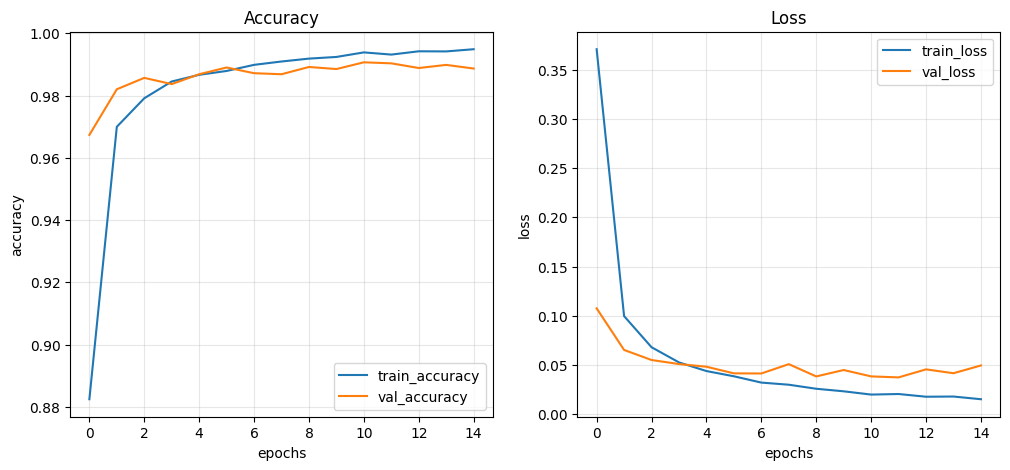

In [20]:
# 시각화 : 학습 곡선 ( 정확도 / 손실 )
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.show()